# Spectral Clustering
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **KNN graph** and other necessary algorithms for **spectral clustering**
- play with the **threshold** of spectral clustering
- apply spectral clustering on toy data and **real world data**, and compare it with k-means

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked to.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from cluster_plot import cluster_plot

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Experiment Spectral Clustering on synthesis data

In [2]:
cluster_data = sio.loadmat('cluster_data.mat')
X = cluster_data['X']

In [3]:
# Uncomment following two line and choose proper parameters
k_in_knn_graph = 200
threshold = 0.2
# begin answer
# end answer

# implement knn_graph in knn_graph.py
from knn_graph import knn_graph

W = knn_graph(X, k_in_knn_graph, threshold)
print(np.sum(W))

874096.0


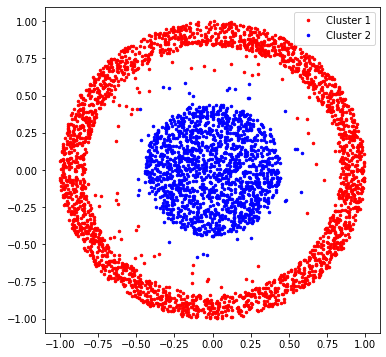

In [4]:
# implement spectral in spectral
from spectral import spectral

idx = spectral(W, 2)

cluster_plot(X, idx)

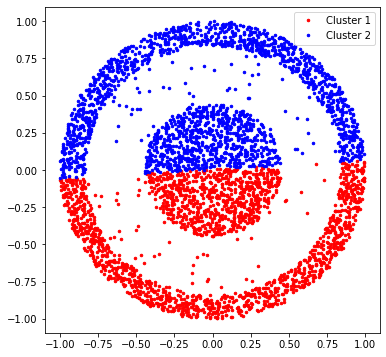

In [5]:
from kmeans import kmeans

idx = kmeans(X, 2)
cluster_plot(X, idx)

## Let's try Spectral Clustering on real-world data!

In [6]:
TDT2_data = sio.loadmat('TDT2_data.mat')
fea = TDT2_data['fea']
gnd = TDT2_data['gnd'].reshape(-1)

In [10]:
from constructW import constructW
from bestMap import bestMap
from MutualInfo import MutualInfo
# YOUR CODE HERE
# begin answer
Spec_accu,Spec_mutInfo ,Kmeans_accu,Kmeans_mutInfo= 0,0,0,0
clusters=np.unique(gnd).shape[0]
numOfsample=fea.shape[0]
n = 1
for i in range(n):
    spectral_idx = bestMap(gnd, spectral(W=constructW(fea, k=5).toarray(), k=clusters))
    Kmeans_idx = bestMap(gnd, kmeans(x = fea.toarray(), k =clusters ))
    Spec_accu += np.sum(gnd == spectral_idx) / numOfsample/n
    Kmeans_accu += np.sum(gnd == Kmeans_idx) / numOfsample/n
    Spec_mutInfo += MutualInfo(gnd, spectral_idx)/n
    Kmeans_mutInfo += MutualInfo(gnd, Kmeans_idx)/n
print('spectral clustering accuracy:', Spec_accu, 'normalized mutual information:', Spec_mutInfo)
print('K-means clustering accuracy:', Kmeans_accu, 'normalized mutual information:', Kmeans_mutInfo)
# end answer

spectral clustering accuracy: 0.7164518574677786 normalized mutual information: 0.6387990197358501
K-means clustering accuracy: 0.46853677028051555 normalized mutual information: 0.38287356234707776
